##Данный Notebook предствляет собой анализ базы данных американских горок

Подлкючим библиотеки

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##Считывание и обзор данных

In [5]:
df = pd.read_csv('/content/coaster_db.csv')

df.shape

(1087, 56)

In [6]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [7]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [8]:
df.dtypes

,0
coaster_name,object
Length,object
Speed,object
Location,object
Status,object
Opening date,object
Type,object
Manufacturer,object
Height restriction,object
Model,object


In [9]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [10]:
df.describe(include=['object', 'bool'])

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,Flash Pass available,Acceleration,Restraints,Name,Type_Main,opening_date_clean,speed1,speed2,speed1_unit,height_unit
count,1087,953,937,1087,874,837,1087,1028,831,744,...,46,60,24,35,1087,837,937,935,937,965
unique,990,569,243,280,15,656,98,102,100,317,...,1,50,12,18,3,602,225,229,2,2
top,Batman: The Ride,935 ft (285 m),50 mph (80 km/h),Other,Operating,1976,Steel,Vekoma,48 in (122 cm),Custom,...,Flash Pass available,0 to 40 mph (0 to 64 km/h) in 3 seconds,Single Lap Bar,Das große LEGO-Rennen,Steel,1999-01-01,50 mph,80 km/h,mph,ft
freq,7,21,63,250,668,7,308,135,224,20,...,46,4,6,4,816,10,63,63,780,794


Теперь удалим не очень важные столбцы

In [12]:
df = df[['coaster_name','Location', 'Status','Manufacturer','year_introduced', 'Type_Main', 'opening_date_clean', 'speed_mph', 'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [13]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])


,coaster_name,Location,Status,Manufacturer,year_introduced,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,Steel,NaT,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,2022,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,Steel,NaT,34.0,NaN,0,NaN


Переименуем некоторые колонки

In [15]:
df = df.rename(columns={
                   'opening_date_clean':'Opening_Date',
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'Gforce'})


,coaster_name,Location,Status,Manufacturer,year_introduced,Type_Main,Opening_Date,speed_mph,height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,Steel,NaT,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,2022,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,Steel,NaT,34.0,NaN,0,NaN


Описание колонок:

**coaster_name**- название горки

**Location** - местоположение

**Status**- статус

**Manufacturer**- производитель

**year_introduced**- год постройки

**Type_Main** - основной тип

**Opening_Date** - дата открытия

**speed_mph**- скорость в mph

**height_ft** - высота в футах

**Inversions** - количество инверсий

**Gforce** - перегрузка

Посчитаем к-во NaN

In [16]:
df.isna().sum()

,0
coaster_name,0
Location,0
Status,213
Manufacturer,59
year_introduced,0
Type_Main,0
Opening_Date,250
speed_mph,150
height_ft,916
Inversions,0


Проверим дубликаты

In [17]:
df.loc[df.duplicated()]

,coaster_name,Location,Status,Manufacturer,year_introduced,Type_Main,Opening_Date,speed_mph,height_ft,Inversions,Gforce


In [18]:
df.loc[df.duplicated(subset=['coaster_name'])]

,coaster_name,Location,Status,Manufacturer,year_introduced,Type_Main,Opening_Date,speed_mph,height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,Steel,NaT,53.0,NaN,3,4.7


In [22]:
df.loc[df.duplicated(subset=['coaster_name','Opening_Date','Location'])]

,coaster_name,Location,Status,Manufacturer,year_introduced,Type_Main,Opening_Date,speed_mph,height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,Steel,NaT,53.0,NaN,3,4.7


Удалим дубликаты

In [24]:
df = df.loc[~df.duplicated(subset=['coaster_name','Opening_Date','Location'])].reset_index(drop=True).copy()
df

,coaster_name,Location,Status,Manufacturer,year_introduced,Type_Main,Opening_Date,speed_mph,height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,Steel,NaT,34.0,NaN,0,NaN


##Теперь рассмотрим особенности этого набора данных

 Распределение по годам открытия

year_introduced
1999    46
2000    45
1998    30
2001    29
2002    28
2008    27
2004    25
2007    24
2011    24
2006    23
Name: count, dtype: int64


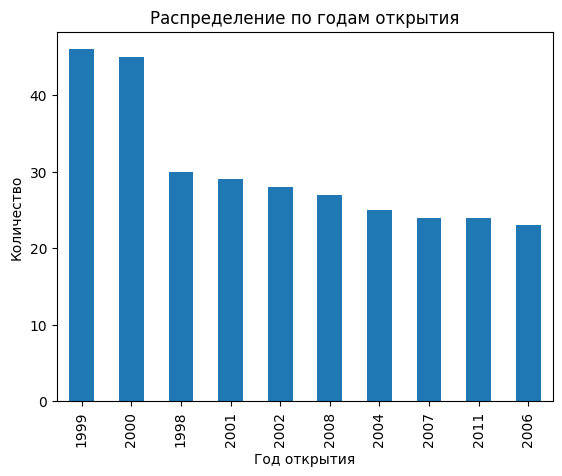

In [46]:
year = df['year_introduced'].value_counts().head(10).plot(kind='bar', title='Распределение по годам открытия')
year.set_xlabel('Год открытия')
year.set_ylabel('Количество')
print(df['year_introduced'].value_counts().head(10))

In [40]:
print(f"Количество горок, построенных после 2000 года: {df[df['year_introduced'] > 2000].shape[0]}")

Количество горок, построенных после 2000 года: 456


In [43]:
print(f"Количество горок, построенных раньше 2000 года: {df[df['year_introduced'] <= 2000].shape[0]}")

Количество горок, построенных раньше 2000 года: 534


Распределение по материалам

Type_Main
Steel    728
Wood     191
Other     71
Name: count, dtype: int64


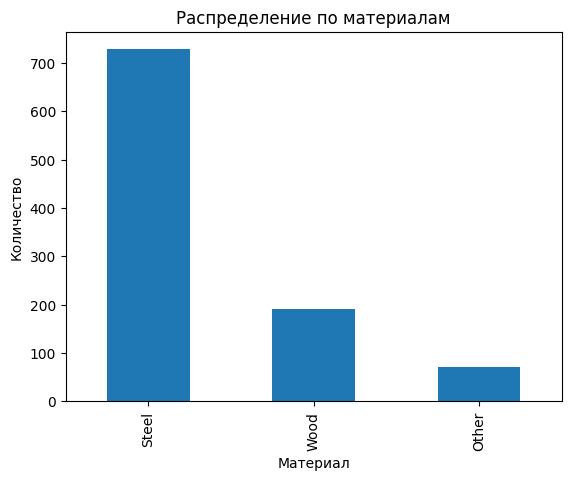

In [45]:
main = df['Type_Main'].value_counts().plot(kind='bar', title='Распределение по материалам')
main.set_xlabel('Материал')
main.set_ylabel('Количество')
print(df['Type_Main'].value_counts())

По скорости

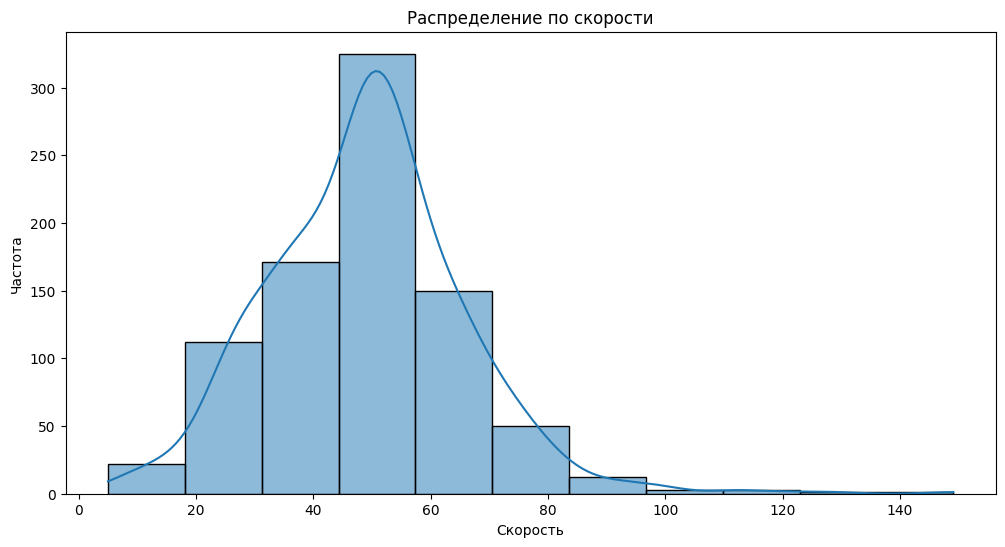

In [78]:
figure = plt.figure(figsize=(12, 6))
sns.histplot(df['speed_mph'], kde=True,bins=11)
plt.title('Распределение по скорости')
plt.xlabel('Скорость')
plt.ylabel('Частота')

plt.show()


По высоте

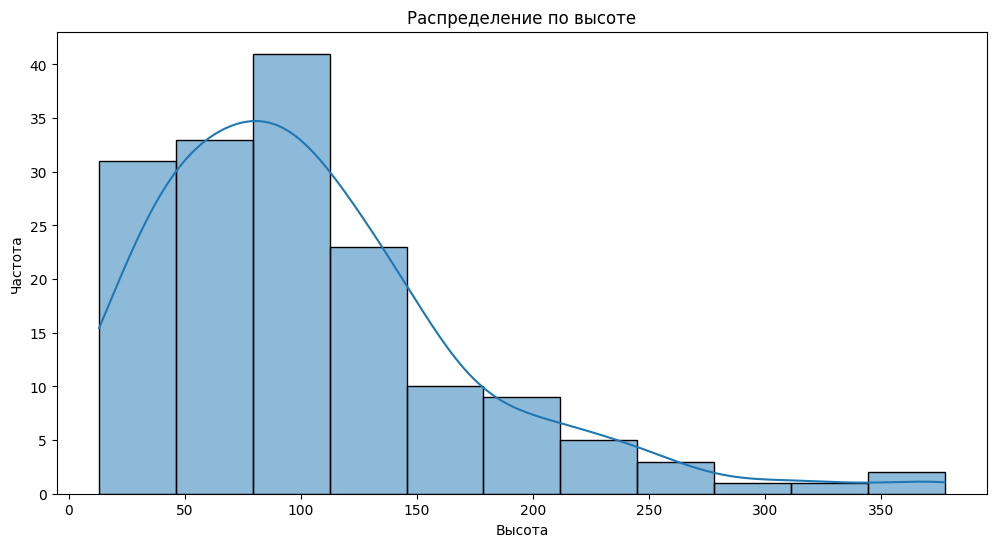

In [79]:
figure = plt.figure(figsize=(12, 6))
sns.histplot(df['height_ft'], kde=True,bins=11)
plt.title('Распределение по высоте')
plt.xlabel('Высота')
plt.ylabel('Частота')

plt.show()

##Взаимосвзяь между столбцами

Связь между скоростью и высотой

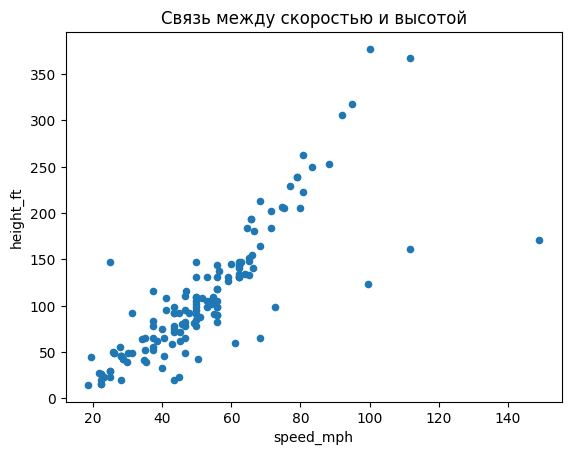

In [57]:
df.plot(kind='scatter', x='speed_mph', y='height_ft', title='Связь между скоростью и высотой')
plt.show()

По диаграмме можно сказать ,что эти две  величины имеют положительную корреляцию.

Скорость и высота от года открытия

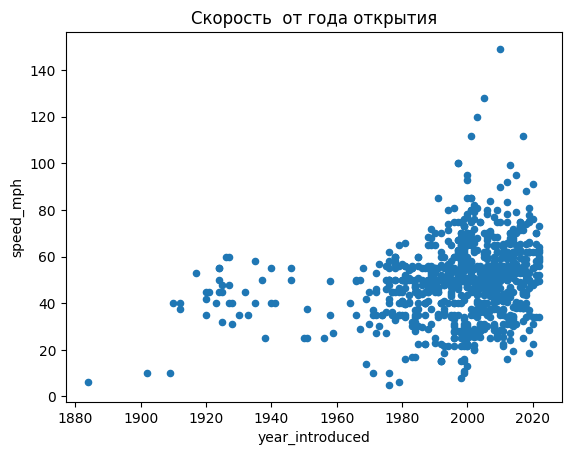

In [62]:
df.plot(kind='scatter', x='year_introduced', y='speed_mph', title='Скорость  от года открытия')
plt.show()

In [67]:
before_2k = df[df['year_introduced'] <= 2000]
print(f"Средняя скорость горок, построенных до 2000 года (включительно): {before_2k['speed_mph'].mean():.2f}")

after_2k = df[df['year_introduced'] > 2000]
print(f"Средняя скорость горок, построенных после 2000 года: {after_2k['speed_mph'].mean():.2f}")

Средняя скорость горок, построенных до 2000 года (включительно): 45.97
Средняя скорость горок, построенных после 2000 года: 52.23


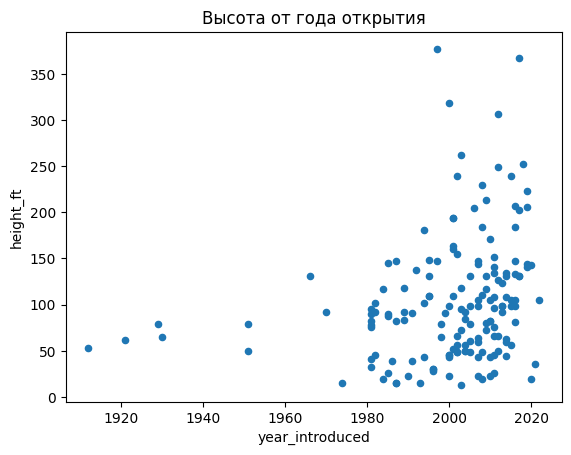

In [63]:
df.plot(kind='scatter', x='year_introduced', y='height_ft', title='Высота от года открытия')
plt.show()

In [66]:
before_2k = df[df['year_introduced'] <= 2000]
print(f"Средняя высота горок, построенных до 2000 года (включительно): {before_2k['height_ft'].mean():.2f}")

after_2k = df[df['year_introduced'] > 2000]
print(f"Средняя высота горок, построенных после 2000 года: {after_2k['height_ft'].mean():.2f}")

Средняя высота горок, построенных до 2000 года (включительно): 84.53
Средняя высота горок, построенных после 2000 года: 115.48


По полученным результатам можно сказать, что со временем разнобразие горок по части высоты и скорости увеличилось. Стали появляться очень высокие и скоростные горки.

Топ производителей по количеству горок

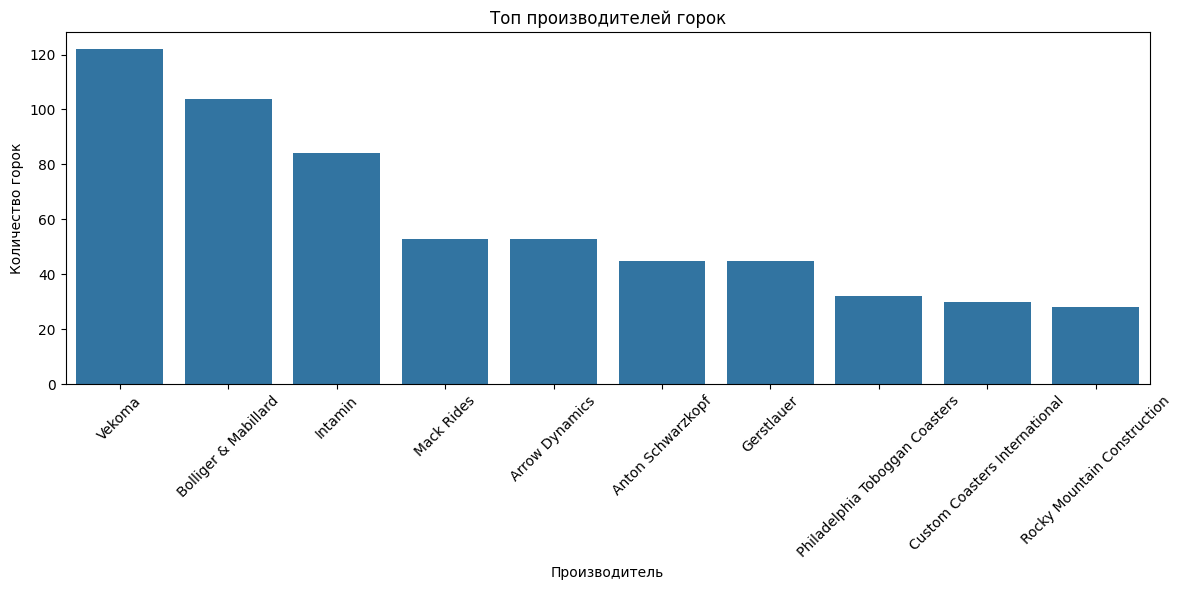

In [81]:
manufacturer = df['Manufacturer'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=manufacturer.index, y=manufacturer.values)
plt.xlabel('Производитель')
plt.ylabel('Количество горок')
plt.title('Топ производителей горок')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()